In [37]:
#import numpy, scipy, math and astropy libraries
import numpy as np
import scipy as sp
import math
import astropy

#import functions for reading data tables
from astropy.io import ascii
from astropy.table import Table, Column

#import packages that stephanie's fit_rossby.py scripts rely on
#import emcee
#import corner

In [38]:
#import graphics packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.colorbar as cb

#set plotting defaults to values that make plots look publication ready
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 11, 7
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 11
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

#ensure that plots show up in our notebook (comment this out if converting to a script)
%matplotlib inline

In [39]:
#set up a list of the paths that change between laptop & desktop
# ClusterData = Table.read("/Users/coveyk/Dropbox/python/ClusterSFH/strings_tables/table2.csv", data_start=1, delimiter=',')
ClusterData = Table.read("/Users/kcovey/Dropbox/python/ClusterSFH/strings_tables/table2.csv", data_start=1, delimiter=',')

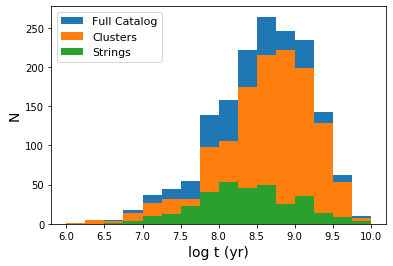

In [71]:
#plot histogram of cluster ages
bins = [6, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10]
n_edges = len(bins)
bin_durations = np.ones(n_edges-1)
bin_centers = np.ones(n_edges-1)
for i in np.arange(n_edges-1):
    start_time = 10.**(bins[i])
    end_time = 10.**(bins[i+1])
    bin_centers[i] = ( start_time + end_time ) / 2.
    #print(start_time, end_time)
    bin_durations[i] = bin_durations[i] * (end_time - start_time)
#print(bin_durations)
output = plt.hist(ClusterData['age'], bins = bins, label = 'Full Catalog')
#print(len(output[0]))
#print(len(bin_durations))

JustClusters = ClusterData[(np.asarray(ClusterData['string']) != 'y' )]
JustClusterHist = plt.hist(JustClusters['age'], bins = bins, label = 'Clusters')

JustStrings = ClusterData[(np.asarray(ClusterData['string']) == 'y' )]
JustStringHist = plt.hist(JustStrings['age'], bins = bins, label = 'Strings')

xlabel = plt.xlabel('log t (yr)') 
ylabel = plt.ylabel('N')
#plt.axis([10**(6),10**10,10**(-11),10**(-6)])

plt.legend()


plt.savefig('NumberCountHistograms.png', bbox_inches='tight') 

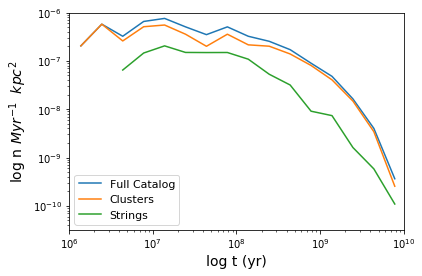

In [70]:
plt.loglog(bin_centers, output[0]/(bin_durations*2*math.pi), label = 'Full Catalog')
plt.loglog(bin_centers, JustClusterHist[0]/(bin_durations*2*math.pi), label = 'Clusters')
plt.loglog(bin_centers[2:], JustStringHist[0][2:]/(bin_durations[2:]*2*math.pi), label = 'Strings')

xlabel = plt.xlabel('log t (yr)') 
ylabel = plt.ylabel('log n $Myr^{-1}~~kpc^{2}$')
plt.axis([10**(6),10**10,10**(-10.5),10**(-6)])

plt.legend()

plt.savefig('FullDistribution.png', bbox_inches='tight') 